# Credit Card Fraud Detection using Decision Tree Classifier,and Random Forest Classifier: Data Exploration, Model Training and Model Evaluation

# Domain Knowledge
* The project operates in the Finance and Fraud Detection domain, where secure transactions are paramount. Fraud detection systems analyze customer behaviors and transaction patterns to identify anomalies indicative of fraudulent activity. These anomalies include unusual transaction amounts, suspicious locations, and atypical transaction methods like online orders or chip usage.
  
# Overview
* The "Credit Card Fraud Detection" project involves identifying fraudulent credit card transactions using machine learning techniques. This project addresses the critical challenge of distinguishing legitimate transactions from fraudulent ones in a highly imbalanced dataset. The aim is to ensure secure transactions and minimize financial losses due to fraud.


# Methodology
* Data Collection or Data Gathering:
  * We collect data from various sources like Kaggle, GitHub, etc., and load it into our IDEs for analysis or modeling.
* Data Preprocessing:
  * Handled imbalanced datasets using techniques like SMOTE (Synthetic Minority Oversampling Technique).
  * Normalized features to ensure a uniform scale across variables.
* Feature Engineering:
  * The dataset is already well-prepared and doesn't require significant feature engineering.
  * Minimal adjustments or transformations are needed.
* Modeling:
  * Implemented machine learning algorithms like Logistic Regression, DecisionTreeClassifier, RandomForestClassifier, and Naive_Bayes 
* Evaluation Metrics:
  * Evaluated models using metrics such as Precision, Recall, F1-Score, and Accuracy due to the class imbalance.

# Key Insights
* Fraudulent transactions often exhibit distinct patterns, such as higher distances from home or increased transaction amounts.
* Handling class imbalance significantly improved model precision and recall.

# Applications
* Fraud Prevention: Detects fraudulent transactions in real-time to prevent losses.
* Risk Management: Assesses fraud risks and allocates resources effectively.
* Behavioral Analysis: Identifies suspicious patterns based on customer behavior.
* Regulatory Compliance: Helps meet financial regulations on fraud monitoring.

# Technology Stack
* IDEs: Jupyter Notebook, Google Colab and VS Code
* Programming Languages & Mathmatics: Python and Statistics
* Libraries: Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, Logistic Regression, Decision Tree, Random Forest, and Naive_Bayes. 


In [ ]:
##

In [33]:
#Import Required helpful Packages/Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imports warnings module and suppresses all warnings
import warnings  
warnings.filterwarnings("ignore")   

In [ ]:
# Data Collection or Collect the Data
data = pd.read_csv(r"D:\Capstone Project\3. Credit card fraud\CC FRUAD\card_transdata.csv")

In [2]:
# Data preprocessing and EDA
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
# Check Summary statistics of the Data
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Check data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [6]:
# Display the count of missing values in each column.
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [7]:
data.max()

distance_from_home                10632.723672
distance_from_last_transaction    11851.104565
ratio_to_median_purchase_price      267.802942
repeat_retailer                       1.000000
used_chip                             1.000000
used_pin_number                       1.000000
online_order                          1.000000
fraud                                 1.000000
dtype: float64

In [8]:
data.min()

distance_from_home                0.004874
distance_from_last_transaction    0.000118
ratio_to_median_purchase_price    0.004399
repeat_retailer                   0.000000
used_chip                         0.000000
used_pin_number                   0.000000
online_order                      0.000000
fraud                             0.000000
dtype: float64

In [15]:
# Counts the occurrences of each value in the 'fraud' column.
ff = data['fraud'].value_counts()
ff

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [13]:
# Groups the data by the 'fraud' column and calculates the mean for each group.
data.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225
1.0,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


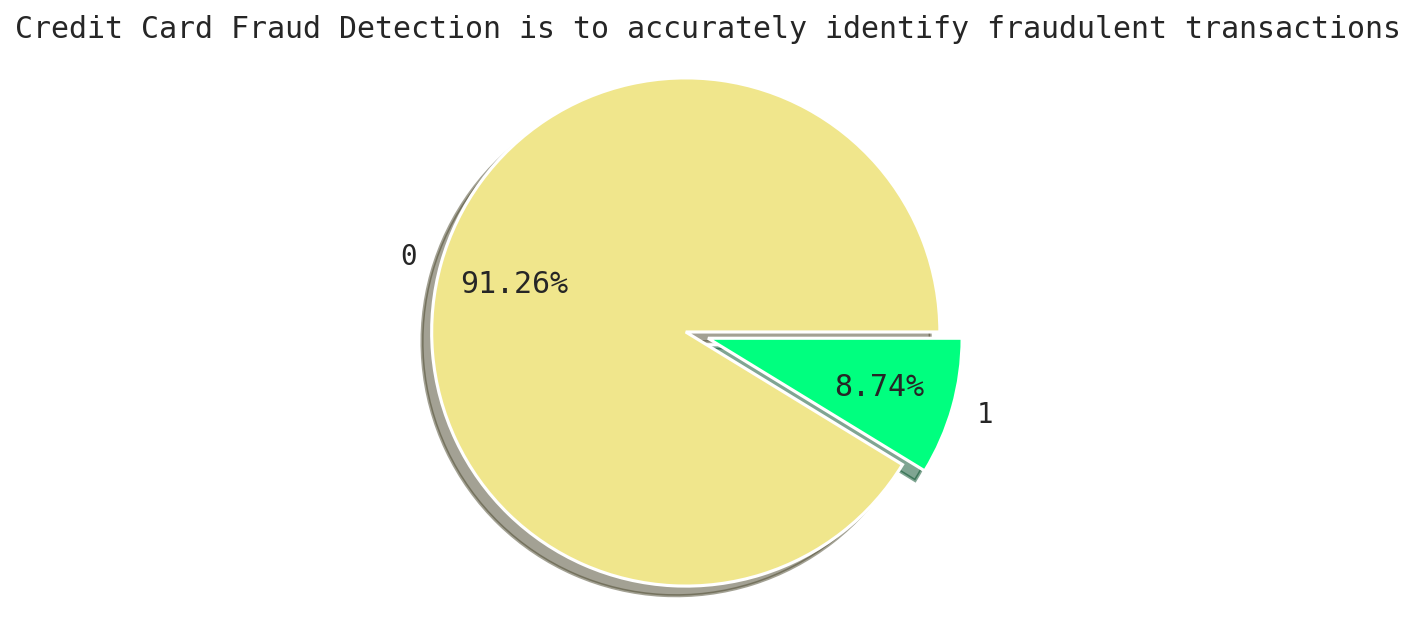

In [18]:
# Display a pie chart showing the distribution of fraudulent vs non-fraudulent transactions.

ff=data['fraud'].value_counts()
level=[0,1]
exp=(0.1,0)
clr=('khaki','springgreen')
plt.figure(figsize=(10,5),dpi=150)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=ff,explode=exp,labels=level,colors=clr,autopct='%0.2F%%',pctdistance=0.7, shadow=True,radius=1.1)
plt.title('Credit Card Fraud Detection is to accurately identify fraudulent transactions')
plt.show()

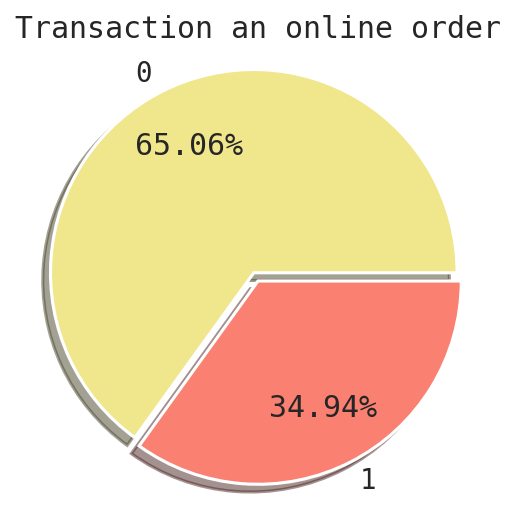

In [19]:
# Display a pie chart showing the distribution of online vs non-online transactions.

ff=data['online_order'].value_counts()
level=[0,1]
exp=(0.05,0)
clr=('khaki','salmon')
plt.figure(figsize=(7,4),dpi=150)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=ff,explode=exp,labels=level,colors=clr,autopct='%0.2F%%',pctdistance=0.7, shadow=True,radius=1.1)
plt.title('Transaction an online order')
plt.show()

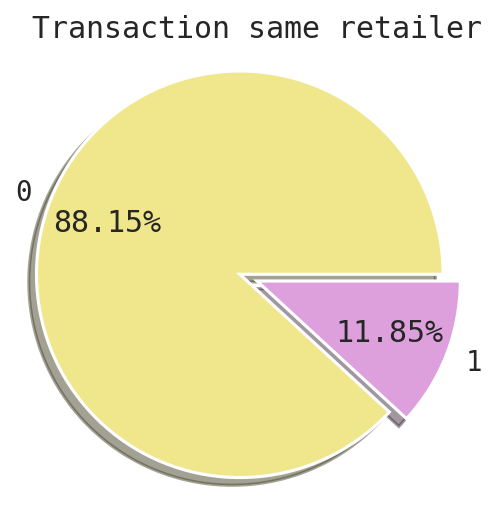

In [20]:
# Display a pie chart showing the distribution of transactions from repeat vs new retailers.

ff=data['repeat_retailer'].value_counts()
level=[0,1]
exp=(0.1,0)
clr=('khaki','plum')
plt.figure(figsize=(7,4),dpi=150)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=ff,explode=exp,labels=level,colors=clr,autopct='%0.2F%%',pctdistance=0.7, shadow=True,radius=1.1)
plt.title('Transaction same retailer')
plt.show()

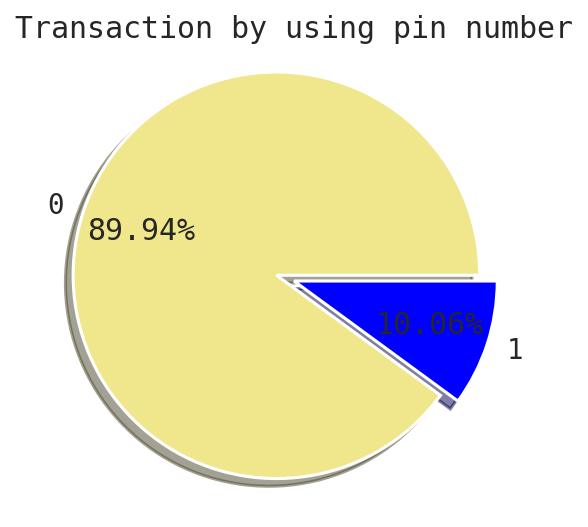

In [21]:
# Display a pie chart showing transactions with and without using a PIN number.

ff=data['used_pin_number'].value_counts()
level=[0,1]
exp=(0.1,0)
clr=('khaki','blue')
plt.figure(figsize=(7,4),dpi=150)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=ff,explode=exp,labels=level,colors=clr,autopct='%0.2F%%',pctdistance=0.7, shadow=True,radius=1.1)
plt.title('Transaction by using pin number')
plt.show()

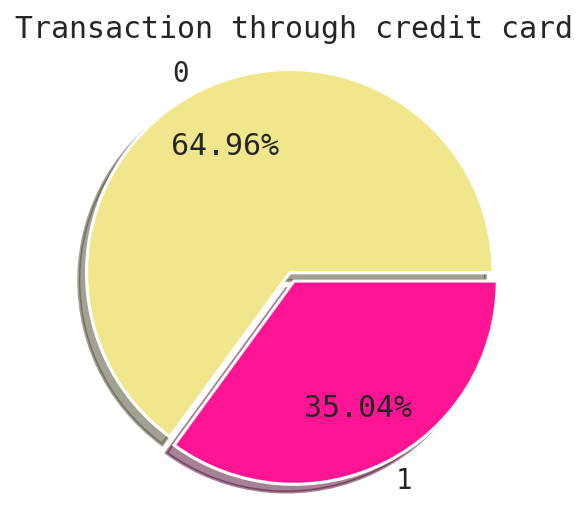

In [22]:
# Display a pie chart showing transactions with and without using a chip.

ff=data['used_chip'].value_counts().values.tolist()
level=[0,1]
exp=(0.05,0)
clr=('khaki','deeppink')
plt.figure(figsize=(7,4),dpi=150)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=ff,explode=exp,labels=level,colors=clr,autopct='%0.2F%%',pctdistance=0.7, shadow=True,radius=1.1)
plt.title('Transaction through credit card')
plt.show()

In [23]:
# Display First Five Rows
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
# Algorithms used for classification:
1. Logistic Regression
2. DecisionTreeClassifier
3. RandomForestClassifier
4. Naive_Bayes
5. KNeighborsClassifier

In [24]:
# Splits the dataset into features (x) by dropping the 'fraud' column and target variable (y) as 'fraud'.

x = data.drop('fraud',axis=1)
y = data['fraud']

In [26]:
print(x)
print("---"*30)
print(y)

        distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2                             0.427715       

In [31]:
y = np.array(y)

In [32]:
print(y)

[0. 0. 0. ... 0. 0. 0.]


### Standardize the Features: Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [1]:
# Standardizes the features (x) to have a mean of 0 and a standard deviation of 1.

ss = StandardScaler()
x = ss.fit_transform(x)

NameError: name 'StandardScaler' is not defined

In [30]:
print(x)

[[ 0.47788202 -0.18284892  0.04349141 ...  1.36157608 -0.33445812
  -1.36442519]
 [-0.24160679 -0.18809398 -0.18930045 ... -0.73444298 -0.33445812
  -1.36442519]
 [-0.3293694  -0.16373307 -0.49881185 ... -0.73444298 -0.33445812
   0.73290937]
 ...
 [-0.36264968 -0.13790278 -0.57369398 ...  1.36157608 -0.33445812
   0.73290937]
 [-0.34209827 -0.1855234  -0.48162807 ... -0.73444298 -0.33445812
   0.73290937]
 [ 0.48140344 -0.18257921 -0.51338354 ...  1.36157608 -0.33445812
   0.73290937]]


In [34]:
# Splits the data into 80% training and 20% testing sets.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=0)

* ### Model Selection and Training:
  * Model Selection: The Random Forest Classifier is selected for its robustness and ability to handle complex, non-linear relationships. It reduces overfitting by averaging multiple decision trees, which improves generalization to unseen data.

  * Model Training: The model is trained on the training data (X_train, y_train) to learn patterns and relationships between the features and the target variable. The Random Forest algorithm builds an ensemble of decision trees and uses majority voting to make predictions.

In [36]:
# Imports LogisticRegression for classification tasks.
from sklearn.linear_model import LogisticRegression

# Choose a Logistic Regression model
lr = LogisticRegression()

# train a Logistic Regression model
model = lr.fit(x_train,y_train)

In [37]:
print(model)

LogisticRegression()


In [41]:
# Model evaluation using predictions
y_pred = model.predict(x_test)

In [44]:
print(y_test)
print()
print(y_pred)

[1. 0. 0. ... 1. 0. 0.]

[0. 0. 0. ... 1. 0. 0.]


In [45]:
# Imports classification_report, confusion_matrix, and accuracy_score for evaluating model performance.
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [48]:
# Model evaluation using confusion matrix
print('Confusion:\n')
confusion_matrix(y_test,y_pred)

Confusion:



array([[181343,   1272],
       [  6886,  10499]], dtype=int64)

In [49]:
# Model evaluation using Accuracy
print('Accuracy:\n')
accuracy_score(y_test,y_pred)

Accuracy:



0.95921

In [51]:
# Print the classification report showing precision, recall, F1-score, and support for each class

print('Classification:\n')
print(classification_report(y_test,y_pred))

Classification:

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182615
         1.0       0.89      0.60      0.72     17385

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



In [52]:
# Imports DecisionTreeClassifier and trains the model on the training data (x_train, y_train).

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
# Predicts the target values using the trained DecisionTreeClassifier on the test data (x_test).
y_pred1 = classifier.predict(x_test)

In [54]:
# Imports classification_report, confusion_matrix, and accuracy_score for evaluating model performance.
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [55]:
# Model evaluation using confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred1))

# Print the classification report showing precision, recall, F1-score, and support for each class
print('Classification Report:\n',classification_report(y_test,y_pred1))

# Model evaluation using Accuracy
print('Accuracy Score:\n',accuracy_score(y_test,y_pred1))

Confusion Matrix:
 [[182615      0]
 [     2  17383]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182615
         1.0       1.00      1.00      1.00     17385

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

Accuracy Score:
 0.99999


In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20,random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [57]:
y_pred2 = classifier.predict(x_test)

In [58]:
# Evaluates the model by printing the Confusion Matrix, Classification Report, 
#and Accuracy Score using the test data (y_test) and predictions (y_pred2).

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred2))
print('\nClassification Report:\n',classification_report(y_test,y_pred2))
print('\nAccuracy Score:\n',accuracy_score(y_test,y_pred2))

Confusion Matrix:
 [[182615      0]
 [     2  17383]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182615
         1.0       1.00      1.00      1.00     17385

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000


Accuracy Score:
 0.99999


In [59]:
# Imports GaussianNB and trains the Naive Bayes model on the training data (x_train, y_train).

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [60]:
y_pred3 = model.predict(x_test)

In [61]:
# Evaluates the model by printing the Confusion Matrix, Classification Report, 
#and Accuracy Score using the test data (y_test) and predictions (y_pred3).

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred3))
print('\nClassification Report:\n',classification_report(y_test,y_pred3))
print('\nAccuracy Score:\n',accuracy_score(y_test,y_pred3))

Confusion Matrix:
 [[179820   2795]
 [  7055  10330]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97    182615
         1.0       0.79      0.59      0.68     17385

    accuracy                           0.95    200000
   macro avg       0.87      0.79      0.83    200000
weighted avg       0.95      0.95      0.95    200000


Accuracy Score:
 0.95075


In [ ]:
#####

In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [63]:
y_pred4 = classifier.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred4))
print('\nClassification Report:\n',classification_report(y_test,y_pred4))
print('\nAccuracy Score:\n',accuracy_score(y_test,y_pred4))

Confusion Matrix:
 [[182537     78]
 [   160  17225]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182615
         1.0       1.00      0.99      0.99     17385

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000


Accuracy Score:
 0.99881
